In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier



with open("mei.csv", 'r', encoding="utf-8") as read_: #read다음에_는 의미가 없다. read랑 헷갈리지말라고 쓴 것. a 라고 해도 무방.
    text=read_.readlines()

rows=[]
for i in text[1:]:
    rows.append(list(map(int,i.split(",")[:-1])))
print(i)

df=pd.DataFrame(rows)
df.columns=["sensor%d"%i for i in range(1,17)]

with open("jo.csv", 'r', encoding="utf-8") as read_:
    text2=read_.readlines()
    

rows2=[]
for i in text2[1:]:
    rows2.append(list(map(int,i.split(",")[:-1])))
print(i)

with open("joo.csv", 'r', encoding="utf-8") as read_:
    text3=read_.readlines()
    
rows9=[]
for i in text3[1:]:
    rows9.append(list(map(int,i.split(",")[:-1])))
print(i)

df2=pd.DataFrame(rows2)
df2.columns=["sensor%d"%i for i in range(1,17)]


df3=pd.DataFrame(rows9)
df3.columns=["sensor%d"%i for i in range(1,17)]

52,54,58,62,63,66,68,70,68,70,70,73,74,75,77,78,Mei
65,68,66,68,71,74,74,76,72,74,74,75,76,77,80,80,조진호
51,55,58,60,66,67,67,69,68,70,74,73,78,76,78,80,최주원


In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import seaborn;
seaborn.set()
from sklearn.multioutput import MultiOutputClassifier

image1 = df.astype('float')
image2 = df2.astype('float')

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

y2 = ['sensor1']
y1 = ['sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','sensor10','sensor11','sensor12','sensor13','sensor14','sensor15','sensor16'] # define y variable, i.e., what we want to predict
print(df.shape) # print the number of rows anc columns

print(df.head())
print(df2.shape)


(20, 16)
   sensor1  sensor2  sensor3  sensor4  sensor5  sensor6  sensor7  sensor8  \
0       91       93       85       90       95       93       86       91   
1       70       73       69       71       76       76       77       78   
2       65       64       68       67       72       71       74       73   
3       13       19       24       29       35       37       41       47   
4      102      100      102       97       99       99       97       96   

   sensor9  sensor10  sensor11  sensor12  sensor13  sensor14  sensor15  \
0       87        87        87        86        88        87        90   
1       74        75        76        78        79        80        78   
2       73        70        72        74        77        77        78   
3       44        48        51        55        58        59        59   
4       92        91        89        89        91        91        90   

   sensor16  
0        87  
1        81  
2        78  
3        62  
4        88  

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
# 데이터셋 로드하기
# [[your code]
data = rows
data2 = rows2
data9 = rows9
# 훈련용 데이터셋 나누기
# [[your code]
X_train = rows[:14]
X_test = rows[14:]

y_train = data9[:14]
y_test = data9[14:]

print("y_train")
print(y_train)
print('-'*90)
print('-'*90)
print("X_train")
print(X_train)
# y_test2 = data2[:16]
# y_test2 = y_test2.reshape(16,4)
# 훈련하기
# [[your code]
print('-/'*90)
print('-/'*90)



y_train
[[58, 59, 60, 63, 66, 69, 70, 70, 70, 70, 71, 72, 76, 76, 77, 78], [55, 59, 64, 64, 66, 69, 70, 71, 68, 71, 70, 73, 75, 75, 78, 76], [55, 58, 59, 63, 67, 68, 70, 71, 68, 70, 71, 72, 76, 77, 77, 77], [56, 58, 61, 63, 62, 67, 71, 71, 69, 71, 71, 73, 75, 76, 75, 78], [58, 59, 62, 68, 67, 70, 69, 74, 69, 71, 73, 73, 77, 78, 77, 78], [50, 52, 55, 58, 60, 63, 65, 67, 67, 66, 68, 69, 73, 73, 75, 76], [29, 34, 37, 41, 46, 51, 52, 55, 54, 56, 59, 61, 65, 66, 68, 70], [35, 39, 44, 46, 52, 54, 58, 60, 58, 60, 62, 64, 68, 70, 71, 72], [58, 61, 63, 66, 67, 69, 71, 72, 68, 72, 73, 72, 77, 77, 77, 82], [60, 62, 64, 66, 69, 71, 73, 73, 74, 71, 72, 75, 77, 78, 78, 80], [55, 59, 59, 63, 64, 67, 67, 70, 69, 74, 71, 73, 76, 79, 78, 78], [27, 32, 40, 41, 48, 49, 53, 53, 55, 57, 58, 61, 64, 67, 68, 70], [0, 0, 6, 12, 21, 25, 30, 34, 35, 41, 42, 49, 52, 49, 56, 58], [21, 26, 34, 35, 40, 44, 50, 48, 52, 55, 59, 58, 62, 64, 66, 68]]
----------------------------------------------------------------------

In [56]:
# from sklearn.linear_model import RidgeClassifierCV
# clf = RidgeClassifierCV().fit(X_train, y_train)

# roc_auc_score(rows4, rows5, average=None)


#열이 16개인 데이터셋


y_train
[[58, 59, 60, 63, 66, 69, 70, 70, 70, 70, 71, 72, 76, 76, 77, 78], [55, 59, 64, 64, 66, 69, 70, 71, 68, 71, 70, 73, 75, 75, 78, 76], [55, 58, 59, 63, 67, 68, 70, 71, 68, 70, 71, 72, 76, 77, 77, 77], [56, 58, 61, 63, 62, 67, 71, 71, 69, 71, 71, 73, 75, 76, 75, 78], [58, 59, 62, 68, 67, 70, 69, 74, 69, 71, 73, 73, 77, 78, 77, 78], [50, 52, 55, 58, 60, 63, 65, 67, 67, 66, 68, 69, 73, 73, 75, 76], [29, 34, 37, 41, 46, 51, 52, 55, 54, 56, 59, 61, 65, 66, 68, 70], [35, 39, 44, 46, 52, 54, 58, 60, 58, 60, 62, 64, 68, 70, 71, 72], [58, 61, 63, 66, 67, 69, 71, 72, 68, 72, 73, 72, 77, 77, 77, 82], [60, 62, 64, 66, 69, 71, 73, 73, 74, 71, 72, 75, 77, 78, 78, 80], [55, 59, 59, 63, 64, 67, 67, 70, 69, 74, 71, 73, 76, 79, 78, 78], [27, 32, 40, 41, 48, 49, 53, 53, 55, 57, 58, 61, 64, 67, 68, 70], [0, 0, 6, 12, 21, 25, 30, 34, 35, 41, 42, 49, 52, 49, 56, 58], [21, 26, 34, 35, 40, 44, 50, 48, 52, 55, 59, 58, 62, 64, 66, 68]]
----------------------------------------------------------------------

/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


결정 함수의 결과 형태: (96, 53)
결정 함수 결과:
[[-5.4035253  -6.39562771 -6.39568423 -5.70539454 -6.39566688 -6.3956696
  -6.39564565 -6.39568309 -6.39550453 -6.39553983 -4.75870015 -5.18080093
  -6.39563002 -6.39563515 -5.70529522 -5.09453347 -6.39566688 -5.70534539
  -5.70496208 -5.70519773 -4.98146457 -4.96858573 -6.39550453 -4.35560358
  -5.70511779 -5.70501043 -4.46720846 -4.83767735 -6.39551901 -1.81494742
  -3.66670658 -4.10659888 -4.88673925 -1.07430955 -3.88003217 -3.7831589
  -5.70541836 -3.74193618 -3.61342851 -3.07148241 -4.19662563 -2.36358102
  -2.71176409 -3.88216474 -3.68266963 -5.3020476  -4.3319896  -4.01592487
  -3.15560377 -3.34015143 -6.39562771 -6.39550453 -6.39561164]
 [-5.4035253  -6.39562771 -6.39568423 -5.70539454 -6.39566688 -6.3956696
  -6.39564565 -6.39568309 -6.39550453 -6.39553983 -4.75870015 -5.18080093
  -6.39563002 -6.39563515 -5.70529522 -5.09453347 -6.39566688 -5.70534539
  -5.70496208 -5.70519773 -4.98146457 -4.96858573 -6.39550453 -4.35560358
  -5.70511779 -5.70

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: cannot reshape array of size 1590 into shape (30,30)

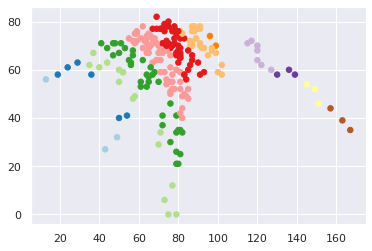

In [108]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
# 데이터셋 로드하기
# [[your code]
data = rows
data2 = rows2
data9 = rows9
# 훈련용 데이터셋 나누기
# [[your code]
X_train = rows[:14]
X_test = rows[14:]

y_train = data9[:14]
y_test = data9[14:]

z_train = data9[:14]

print("y_train")
print(y_train)
print('-'*90)
print('-'*90)
print("X_train")
print(X_train)
# y_test2 = data2[:16]
# y_test2 = y_test2.reshape(16,4)
# 훈련하기
# [[your code]
print('-/'*90)
print('-/'*90)

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
# X2, y2 = make_classification(n_samples=1000, n_features=4,
#                              n_informative=2, n_redundant=0,
#                              random_state=0, shuffle=False)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X2, y2)
# print(X2)
# print('-/'*90)
# print('-/'*90)
xtt = np.array(X_train)
xt = xtt.reshape(-1,)
ytt = np.array(y_train) #numpy array 로 바꿈!!
yt = ytt.reshape(-1,) # numpy array 차원 축소!!! 1차원으로 만들어주기
ett = np.array(y_test)
ettt = ett.reshape(-1,)
zt = np.array(z_train)

print("xt : X_train 에 해당")
print(xt)
print('-'*90)
print("yt: y_train 에 해당 ")
print(yt)
print('-'*90)
print("ett : y_test 에 해당")
print(ettt)
print('-'*90)

xt = np.expand_dims(xt, axis=0) # 차원 확대
yt = np.expand_dims(yt, axis=0) # 차원 확대 
np.expand_dims(xt, axis=0)
np.expand_dims(yt, axis=0)

print("xt")
print(xt)
print('-'*90)
print("yt")
print(yt)
print('-'*90)
print('-*'*90)
# clf = MultiOutputClassifier(KNeighborsClassifier()).fit(xt,yt) # 2차원 이상의 배열이 필요함...
knn = KNeighborsClassifier(n_neighbors=1)#여기에서 n_neighbers =1 이 중요!!! 입력 데이터 형태를 보면 1로 해야함
knn = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=1)).fit(xt,yt) #2차원 필요
print("knn 예측치")
knnmaster1 = knn.predict(xt[-2:]) #We select the training set with the [:-1] Python syntax,
#which produces a new array that contains all but the last item from digits.data:
print("knmaster1")
print(knnmaster1)
print('-*'*90)


print("정답률=", knn.score(yt, xt)) ###########################


print('-*'*90)
model = RandomForestClassifier()
model.fit(xt, yt)
print('-'*90)
# 예측하기
# [[your code]
y_pred1 = model.predict(xt)
# 정답률 출력하기
# [[your code]
print(y_pred1)
print('-'*90)
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(xt, yt)
y_pred2 = decision_tree.predict(xt)
print("Decision Tree classifier 예측치")
print(y_pred2)
print('-'*90)

y_testt = np.transpose(y_test)
print(y_test)
print('-'*90)
#y_test = np.expand_dims(y_test, axis=0)

print('y_test')
print(y_test)
print('-'*90)
print('y_pred1')
print(y_pred1)
print('-'*90)
print('-'*90) 
#svm 은 y 가 1차원이어야 한다고 한다.
yt2 = yt.reshape(-1,) # numpy array 차원 축소!!! 1차원으로 만들어주기
xt2 = xt.reshape(-1,)
xt3 = xt2.reshape(-1, 1)
yt3 = yt2.reshape(-1, 1) #조진호(사람2) 데이터            
ett2 = ett.reshape(-1,)
ett3 = ett.reshape(-1, 1) #최주원(사람3) 데이터
zt3 = zt.reshape(-1,)
zt3 = zt.reshape(-1,1)

print("zt3")
print(zt3)
print('+++++'*60)
print("xt2 : xt를 reshape 으로(-1,) 한 결과 ")
print(xt2)
print(',=,='*90)
print("xt3 : xt2를 reshape 으로 (-1,1)한 결과 ")
print(xt3)
print('/./.'*90)
from sklearn import svm

print('-'*90)
print('-'*90)
print("ett3")
print(ett3)
ett4 =ett3.reshape(-1,)
yt33 = yt3.reshape(-1,) #차원축소
xt33 = xt3.reshape(-1,)

print('0-0-'*90)
print(ett4.shape) 
print(yt3.shape)
yt4 = yt3.reshape(-1,)
ett3= ett3.reshape(-1,)
print(yt4)
print("ett4")
print(ett4)
yt5 = yt4[:96]
print("yt5")
print(yt5)
accuracy = accuracy_score(ett4, yt5) #같은 shape 이어야 함. accuracy 랑 다른게 있다. 


print("정확도 계산중... ")
print(" 정확도는 다음과 같다 ")
print(accuracy*100)
# from sklearn.datasets import make_blobs
# import matplotlib.pyplot as plt

# X,y = make_multilabel_classification(n_classes= 3,random_state = 0)

# clf.predict(X[-2:])


# knn = KNeighborsClassifier(n_neighbors=3)
# classifier = MultiOutputClassifier(knn, n_jobs=-1)
# classifier.fit(y_test,y_pred)
# predictions = classifier.predict(y_train)
# classifier.score(y_true,np.array(y_train))

# from sklearn.linear_model import RidgeClassifierCV
# clf = RidgeClassifierCV().fit(X_train, y_train)
# y_score = clf.decision_function(X_train)
# roc_auc_score(y_test, y_train, average=None)

# from sklearn.datasets import make_multilabel_classification
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score

# X, y = make_multilabel_classification(random_state=0)
# inner_clf = LogisticRegression(solver="liblinear", random_state=0)
# clf = MultiOutputClassifier(inner_clf).fit(X, y)
# y_score = np.transpose([y_pred[:, 1] for y_pred in clf.predict_proba(X)])
# roc_auc_score(y, y_score, average=None)
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles




# clf9 = Pipeline([
#   ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
#   ('classification', RandomForestClassifier())
# ])
ett999 = ett3.reshape(-1,1)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(xt3, yt3)
print("결정 함수의 결과 형태: {}".format(gbrt.decision_function(ett999).shape))#2차원 요구--> ett3
# plot the first few entries of the decision function
print("결정 함수 결과:\n{}".format(gbrt.decision_function(ett999)[:6, :]))
print('/*/'*90)
print("가장 큰 결정 함수의 인덱스:\n{}".format(
      np.argmax(gbrt.decision_function(ett999), axis=1)))
print("예측:\n{}".format(gbrt.predict(ett999)))
# 가장 큰 결정 함수의 인덱스:
# [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
#  0]
# 예측:
# [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
#  0]
print('/*/'*90)
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("예측 확률:\n{}".format(gbrt.predict_proba(ett999)[:6]))
# 행 방향으로 확률을 더하면 1 이 됩니다
print("합: {}".format(gbrt.predict_proba(ett999)[:6].sum(axis=1)))
# 예측 확률:
# [[0.10664722 0.7840248  0.10932798]
#  [0.78880668 0.10599243 0.10520089]
#  [0.10231173 0.10822274 0.78946553]
#  [0.10664722 0.7840248  0.10932798]
#  [0.10825347 0.66344934 0.22829719]
#  [0.78880668 0.10599243 0.10520089]]
# 합: [1. 1. 1. 1. 1. 1.]
print('/*/'*90)




xt39 = np.transpose(xt3)
yt39 = np.transpose(yt3)
ett39 = np.transpose(ett3)
zt39 = np.transpose(zt3)
print("zt39")
print(zt39.shape)
print(zt39)
s = [0.7*np.linalg.norm([a, b]) for a, b in zip(xt3, yt3)]
s = [a / max(s) for a in s]  # scale
print("ett3.shape")
print(ett3.shape)
print("xt39.shape")
print(xt39.shape)
print(xt39)

ax= plt.scatter(xt39[:100], yt39[:100], c=s, s=30, cmap=plt.cm.Paired)
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
clf.fit(xt3,yt3) #2차원으로 fit X(왼쪽 xt3)에는 포인트가 있고 Y에는 해당 포인트가 속한 클래스가 있습니다.
# 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
print("XX.shape")
print(XX.shape)



xy = np.vstack([XX.ravel(), YY.ravel()]).T
print("xy.shape")
print(xy.shape)
xy = xy.reshape(-1,1)


xy1 = xy[:30]
xy1 = xy1.flatten()
xy1 = xy1[:899]
print("xy1")
print(xy1)
xy1 = xy1.reshape(-1,1)
xy2 = xy1[:30]
xy3 = xy2.flatten()
print("xy3")
print(xy3)
xy3 = xy3[:30]
xy99 = xy3.reshape(30,)
print("xy3")
print(xy3)
xy5= xy99.reshape(-1,1)

Z = clf.decision_function(xy5).reshape(30,30)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.2, linestyles=['--', '-', '--'])
# 지지벡터(Support Vector) 표현 
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()
fig = plt.figure(figsize=(6, 6))


ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(xt39[:100], yt39, yt39[:100], c= s , marker='o', s=15, cmap='Greens')





In [ ]:
print(yt3.shape)
yt4 = yt3.reshape(-1,)
print(yt4)
print("ett4")
print(ett4)
yt5 = yt4[:96]
print("yt5")
print(yt5)
accuracy = accuracy_score(ett4, yt5) #같은 shape 이어야 함. accuracy 랑 다른게 있다. 


print("정확도 계산중... ")
print(" 정확도는 다음과 같다 ")
print(accuracy*100)
# from sklearn.datasets import make_blobs
# import matplotlib.pyplot as plt

# X,y = make_multilabel_classification(n_classes= 3,random_state = 0)

# clf.predict(X[-2:])


# knn = KNeighborsClassifier(n_neighbors=3)
# classifier = MultiOutputClassifier(knn, n_jobs=-1)
# classifier.fit(y_test,y_pred)
# predictions = classifier.predict(y_train)
# classifier.score(y_true,np.array(y_train))

# from sklearn.linear_model import RidgeClassifierCV
# clf = RidgeClassifierCV().fit(X_train, y_train)
# y_score = clf.decision_function(X_train)
# roc_auc_score(y_test, y_train, average=None)

# from sklearn.datasets import make_multilabel_classification
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score

# X, y = make_multilabel_classification(random_state=0)
# inner_clf = LogisticRegression(solver="liblinear", random_state=0)
# clf = MultiOutputClassifier(inner_clf).fit(X, y)
# y_score = np.transpose([y_pred[:, 1] for y_pred in clf.predict_proba(X)])
# roc_auc_score(y, y_score, average=None)
s = [0.1*np.linalg.norm([a, b]) for a, b in zip(xt3, yt3)]
s = [a / max(s) for a in s]  # scale

plt.scatter(xt3[:224], xt3[:224], c=s, s=30, cmap=plt.cm.Paired)
# 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
# 지지벡터(Support Vector) 표현
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()